# Kaggle Galaxy Zoo Competition

In [1]:
%matplotlib inline

path = "data/galaxy/sample/"
#path = "data/galaxy/"

train_path = path + 'train/'
valid_path = path + 'valid/'
test_path = path + 'test/'
results_path = path + 'results/'
model_path = path + 'model/'

In [2]:
from utils import *

Using Theano backend.


In [3]:
batch_size = 32
num_epoch = 1

In [4]:
import pandas as pd
df = pd.read_csv(path+ "train.csv")
df_val = pd.read_csv(path+ "valid.csv")

In [5]:
# custom iterator for regression
import Iterator; reload(Iterator)
from Iterator import DirectoryIterator

imgen = image.ImageDataGenerator()
batches = DirectoryIterator(train_path, imgen, 
                            class_mode=None, 
                            dataframe=df,
                            batch_size=4)

val_imgen = image.ImageDataGenerator()
val_batches = DirectoryIterator(valid_path, val_imgen, 
                            class_mode=None, 
                            dataframe=df_val,
                            batch_size=4)

Found 1500 images belonging to 1 classes.
Found 291 images belonging to 1 classes.


In [6]:
imgs, target = next(batches)
imgs[0].shape

(3, 256, 256)

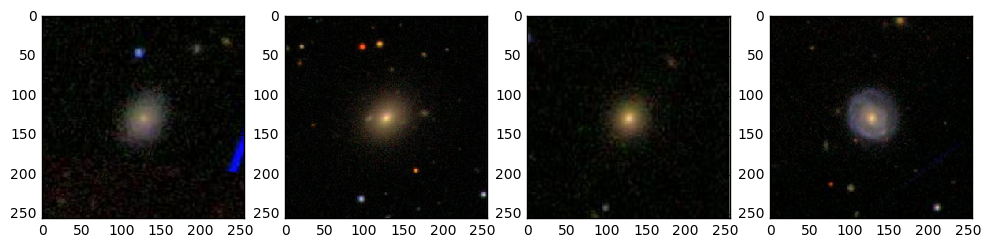

In [7]:
plots(imgs)

### First Model
2 layer CNN

In [8]:
def conv1():
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3,256,256)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(37)
        ])
    
    model.compile(Adam(lr=0.001), loss='mse')
    return model

In [28]:
model = conv1()

In [25]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_5 (BatchNorma (None, 3, 256, 256)   12          batchnormalization_input_2[0][0] 
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 32, 254, 254)  896         batchnormalization_5[0][0]       
____________________________________________________________________________________________________
batchnormalization_6 (BatchNorma (None, 32, 254, 254)  128         convolution2d_3[0][0]            
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 32, 84, 84)    0           batchnormalization_6[0][0]       
___________________________________________________________________________________________

In [29]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/20
1500/1500 [==============================] - 248s - loss: 0.0944 - val_loss: 470.8613
Epoch 2/20
1500/1500 [==============================] - 267s - loss: 0.0387 - val_loss: 118.4689
Epoch 3/20
1500/1500 [==============================] - 357s - loss: 0.0366 - val_loss: 90696.3938
Epoch 4/20
1500/1500 [==============================] - 334s - loss: 0.0350 - val_loss: 3.0087
Epoch 5/20
1500/1500 [==============================] - 351s - loss: 0.0304 - val_loss: 0.0813
Epoch 6/20
1500/1500 [==============================] - 357s - loss: 0.0288 - val_loss: 0.0316
Epoch 7/20
1500/1500 [==============================] - 360s - loss: 0.0246 - val_loss: 155.1175
Epoch 8/20
1500/1500 [==============================] - 365s - loss: 0.0189 - val_loss: 0.0952
Epoch 9/20
1500/1500 [==============================] - 396s - loss: 0.0160 - val_loss: 97.9904
Epoch 10/20
1500/1500 [==============================] - 455s - loss: 0.0158 - val_loss: 0.5070
Epoch 11/20
1500/1500 [===============

KeyboardInterrupt: 

In [24]:
model.save_weights(model_path+'conv1.h5')

In [ ]:
test_batches = get_batches(test_path, batch_size=64, target_size=(256,256))

In [ ]:
test_files = test_batches.filenames
test_out = model.predict_generator(test_batches, test_batches.nb_sample)
save_array(results_path+'test_out.dat', test_out)

In [ ]:
features = list(df.columns.values)
test_ids = [os.path.splitext(f) for f in test_files]
submission = pd.DataFrame(test_out, columns=features[2:])
submission.insert(0, 'GalaxyID', [int(a[0][7:]) for a in test_ids])
submission.head()

In [ ]:
subm_name = results_path+'subm.csv'
submission.to_csv(subm_name, index=False)
FileLink(subm_name)

## To Do:

1. Data Augmentation to reduce overfitting
2. Custom output layer for output question constraints
3. Dropout on dense layers (need all the data)
4. Larger network, different arch

### Data Augmentation

TODO: Crop images

In [ ]:
imgen_aug = image.ImageDataGenerator(horizontal_flip=True)
batches = DirectoryIterator(train_path, imgen_aug, 
                            class_mode=None, 
                            dataframe=df,
                            batch_size=4)
model = conv1()
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Found 1500 images belonging to 1 classes.
Epoch 1/5
1500/1500 [==============================] - 254s - loss: 0.1065 - val_loss: 212.2430
Epoch 2/5
1500/1500 [==============================] - 283s - loss: 0.0562 - val_loss: 0.5155
Epoch 3/5
1500/1500 [==============================] - 408s - loss: 0.0390 - val_loss: 0.2847
Epoch 4/5
1500/1500 [==============================] - 627s - loss: 0.0292 - val_loss: 157.9813
Epoch 5/5
1500/1500 [==============================] - 666s - loss: 0.0269 - val_loss: 18.7991


In [ ]:
imgen_aug = image.ImageDataGenerator(rotation_range=360)
batches = DirectoryIterator(train_path, imgen_aug, 
                            class_mode=None, 
                            dataframe=df,
                            batch_size=4)
model = conv1()
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Found 1500 images belonging to 1 classes.
Epoch 1/5
 244/1500 [===>..........................] - ETA: 398s - loss: 0.2137

In [ ]:
imgen_aug = image.ImageDataGenerator(width_shift_range=0.05)
batches = DirectoryIterator(train_path, imgen_aug, 
                            class_mode=None, 
                            dataframe=df,
                            batch_size=4)
model = conv1()
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [9]:
imgen_aug = image.ImageDataGenerator(channel_shift_range=20)
batches = DirectoryIterator(train_path, imgen_aug, 
                            class_mode=None, 
                            dataframe=df,
                            batch_size=4)
model = conv1()
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Found 1500 images belonging to 1 classes.
Epoch 1/5
1500/1500 [==============================] - 245s - loss: 0.1264 - val_loss: 0.0436
Epoch 2/5
1500/1500 [==============================] - 243s - loss: 0.0477 - val_loss: 0.1824
Epoch 3/5
1500/1500 [==============================] - 243s - loss: 0.0385 - val_loss: 0.0302
Epoch 4/5
1500/1500 [==============================] - 243s - loss: 0.0329 - val_loss: 0.0290
Epoch 5/5
1500/1500 [==============================] - 242s - loss: 0.0323 - val_loss: 0.0287


In [10]:
imgen_aug = image.ImageDataGenerator(horizontal_flip=True,
                                    rotation_range=180,
                                    width_shift_range=0.05,
                                    channel_shift_range=20)
batches = DirectoryIterator(train_path, imgen_aug, 
                            class_mode=None, 
                            dataframe=df,
                            batch_size=4)
model = conv1()
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Found 1500 images belonging to 1 classes.
Epoch 1/5
1500/1500 [==============================] - 246s - loss: 0.1070 - val_loss: 0.0347
Epoch 2/5
1500/1500 [==============================] - 246s - loss: 0.0383 - val_loss: 0.0325
Epoch 3/5
1500/1500 [==============================] - 245s - loss: 0.0380 - val_loss: 0.0328
Epoch 4/5
1500/1500 [==============================] - 246s - loss: 0.0346 - val_loss: 0.0323
Epoch 5/5
1500/1500 [==============================] - 246s - loss: 0.0341 - val_loss: 0.0272


In [12]:
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/5
1500/1500 [==============================] - 247s - loss: 0.0325 - val_loss: 0.0272
Epoch 2/5
1500/1500 [==============================] - 246s - loss: 0.0331 - val_loss: 0.0285
Epoch 3/5
1500/1500 [==============================] - 247s - loss: 0.0343 - val_loss: 0.0309
Epoch 4/5
1500/1500 [==============================] - 246s - loss: 0.0337 - val_loss: 0.0262
Epoch 5/5
1500/1500 [==============================] - 245s - loss: 0.0347 - val_loss: 0.0305


### Output Layer

TODO: test this using outputs from conv1

In [36]:
def output_constraint(x):
    q1 = K.softmax(x[:, 0:3])
    q2 = K.softmax(x[:, 3:5])
    q3 = K.softmax(x[:, 5:7])
    q4 = K.softmax(x[:, 7:9])
    q5 = K.softmax(x[:, 9:13])
    q6 = K.softmax(x[:, 13:15])
    q7 = K.softmax(x[:, 15:18])
    q8 = K.softmax(x[:, 18:25])
    q9 = K.softmax(x[:, 25:28])
    q10 = K.softmax(x[:, 28:31])
    q11 = K.softmax(x[:, 31:37])
    
    return K.concatenate([q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11])

In [37]:
def conv1_outconst():
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3,256,256)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(37),
            Lambda(output_constraint, output_shape=None)
        ])
    
    model.compile(Adam(lr=0.001), loss='mse')
    return model

In [38]:
model = conv1_outconst()
model.summary()

/home/ubuntu/anaconda2/envs/fastai/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_5 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 37)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_37 (BatchNorm (None, 3, 256, 256)   12          batchnormalization_input_7[0][0] 
____________________________________________________________________________________________________
convolution2d_19 (Convolution2D) (None, 32, 254, 254)  896         batchnormalization_37[0][0]      
____________________________________________________________________________________________________
batchnormalization_38 (BatchNorm (None, 32, 254, 254)  128         convolution2d_19[0][0]           
____________________________________________________________________________________________________
maxpooling2d_19 (MaxPooling2D)   (None, 32, 84, 84)    0           batchnormalization_38[0][0]      
___________________________________________________________________________________________

In [39]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/5
1500/1500 [==============================] - 250s - loss: 0.0724 - val_loss: 0.0614
Epoch 2/5
1500/1500 [==============================] - 248s - loss: 0.0632 - val_loss: 0.0626
Epoch 3/5
1500/1500 [==============================] - 250s - loss: 0.0638 - val_loss: 0.0625
Epoch 4/5
1500/1500 [==============================] - 249s - loss: 0.0628 - val_loss: 0.0602
Epoch 5/5
1500/1500 [==============================] - 248s - loss: 0.0624 - val_loss: 0.0602


### Regularization